## Project Objective:
We are building a calories burnt predictive system using XGBoost based on the user's height, weight, exercise duration, exercise heart rate, etc. 

The system is at the end of this notebook. Please feel free to try it out! 

## Workflow
1. Data collection
2. Data preprocessing
3. Data analysis and visualization
4. Train test split
5. Model training: XGBoost Regressor
6. Model evaluation

### Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Data Collection and Pre-Processing

In [3]:
# loading the dataset
calories = pd.read_csv('calories.csv')

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
calories.shape

(15000, 2)

In [5]:
exercise_data = pd.read_csv('exercise.csv')

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
exercise_data.shape

(15000, 8)

### Combining the two Dataframes

In [7]:
calories_data = pd.merge(exercise_data, calories, left_on='User_ID', right_on='User_ID', how='left')

In [8]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [13]:
# getting some information about the data; one way to check missing values
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Data Analysis

In [15]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Data Visualization

In [16]:
sns.set()

C:\Users\zxy23\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

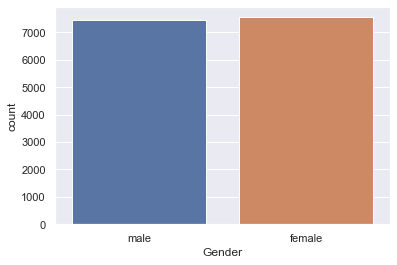

In [17]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

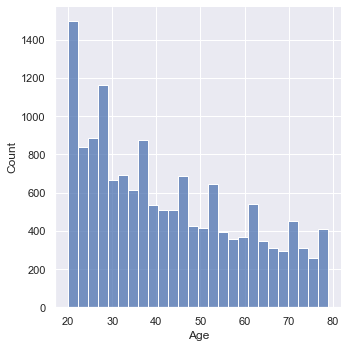

In [21]:
# finding the distribution of 'Age' column
sns.displot(data = calories_data, x = "Age")

In [25]:
# sns.kdeplot(data = calories_data, x = "Age")

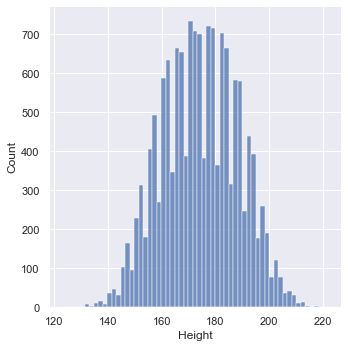

In [26]:
# finding the distribution of 'Height' column
sns.displot(data = calories_data, x = "Height")

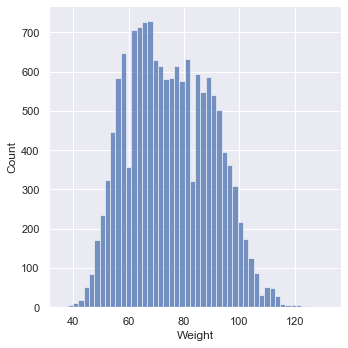

In [27]:
# finding the distribution of 'Weight' column
sns.displot(data = calories_data, x = "Weight")

### Finding the Correlation in the dataset

In [30]:
# drop the user id and gender columns
calories_data_cor = calories_data.drop(columns = ['User_ID', 'Gender'], inplace = False)

In [31]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [32]:
calories_data_cor.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [33]:
correlation = calories_data_cor.corr()

<AxesSubplot:>

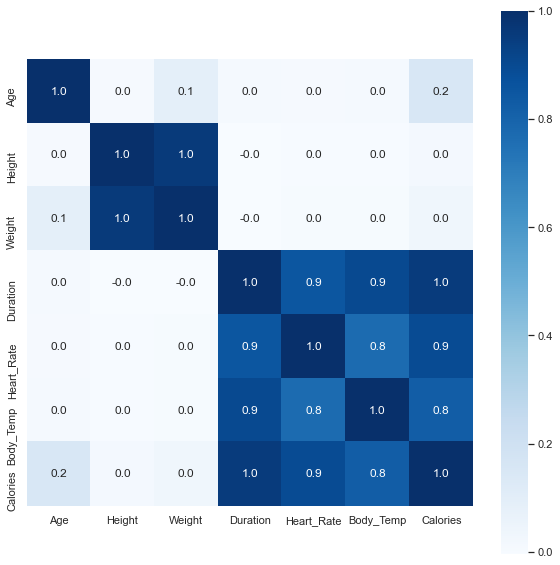

In [40]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, cmap = 'Blues')

### Converting the text data to numerical values

In [41]:
calories_data.Gender.value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [42]:
calories_data.replace({'Gender': {'male': 0, 'female': 1}}, inplace = True)

In [43]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [44]:
calories_data.dtypes

User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

### Separating features and the target

In [47]:
X = calories_data.drop(columns = ['User_ID', 'Calories'], axis = 1)
Y = calories_data['Calories']

In [48]:
X.shape, Y.shape

((15000, 7), (15000,))

### Splitting the data into training and test data

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [50]:
X.shape, X_train.shape, X_test.shape

((15000, 7), (12000, 7), (3000, 7))

### Model training: XGBoost Regressor

In [51]:
# loading the model
model = XGBRegressor()

In [52]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Model evaluation: mean absolute error

In [53]:
# prediction on training data
train_data_prediction = model.predict(X_train)

In [54]:
mae = metrics.mean_absolute_error(Y_train, train_data_prediction)
mae

0.9656331550205747

In [55]:
# prediction on training data
test_data_prediction = model.predict(X_test)
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error on test data: ', mae_test)

Mean Absolute Error on test data:  1.4807048829992613


### Building a predictive system

In [80]:
# getting the user's information
user_gender = input('Are you a lady (1) or a gentleman (0)? ')
uer_age = input('May I ask how old you are? ')
user_height = input('May I ask how tall (cm) you are? ')
user_weight = input("How about your weight (kg)? I won't tell anyone! ")
user_duration = input('How long (min) did you exercise? ')
user_heart_rate = input('What is your average heart rate during exercising? ')
user_boday_temp = input('What is your average body temperature (celcius) during exercising? ')

user_info = (int(user_gender), int(uer_age), float(user_height), float(user_weight), float(user_duration), float(user_heart_rate), float(user_boday_temp))
user_input = np.asarray(user_info)
user_input_reshape = user_input.reshape(1, -1)

user_prediction = model.predict(user_input_reshape)
print('\n')

print('You have burnt {0:.2f} calories during exercising! Well done!'.format(user_prediction[0], 2))

Are you a lady (1) or a gentleman (0)? 1
May I ask how old you are? 28
May I ask how tall (cm) you are? 157
How about your weight (kg)? I won't tell anyone! 55
How long (min) did you exercise? 60
What is your average heart rate during exercising? 90
What is your average body temperature (celcius) during exercising? 38


You have burnt 142.45 calories during exercising! Well done!
